In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import numpy.ma as ma

In [3]:
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

In [4]:
waterMassThickness = pd.read_csv("./waterMassThickness_v2.csv")
del(waterMassThickness["Unnamed: 0"])
del(waterMassThickness["Unnamed: 0.1"])

In [5]:
waterMassThickness

,CDW,DSW,ISW,LSSW,mCDW,month,region,zlowest,windMonMean,v10SlopeMonMean,...,v10MonMean,stress_curl_slope_MonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth,DSW_CI,ISW_CI,LSSW_CI,CDW_CI,mCDW_CI
0,NaN,NaN,NaN,NaN,NaN,1,WSA1,NaN,-0.834152,0.328677,...,0.437478,1.345608e-09,0.652852,-1.345608e-09,530.862704,[ 0. 0.],[ 0. 0.],[ 0. 0.],[ 0. 0.],[ 0. 0.]
1,0.000000,341.731088,422.138403,140.712801,0.000000,2,WSA1,-844.276806,-0.657999,0.995702,...,0.719936,1.159864e-08,0.262482,-1.159864e-08,530.862704,[ 321.62925948 422.13840307],[ 402.03657435 502.54571794],[ 100.50914359 160.81462974],[ 0. 0.],[ 0. 0.]
2,0.000000,368.417907,409.353230,102.338308,20.467662,3,WSA1,-736.835814,-0.499676,1.244083,...,0.989807,1.822503e-08,0.083807,-1.822503e-08,530.862704,[ 327.4825842 388.88556874],[ 388.88556874 429.82089176],[ 61.40298454 102.33830756],[ 0. 0.],[ 0. 40.93532303]
3,0.000000,360.530248,360.530248,220.324040,0.000000,4,WSA1,-721.060496,-0.939502,0.889780,...,0.806171,2.422308e-08,-0.020297,-2.422308e-08,530.862704,[ 360.53024778 380.55970599],[ 360.53024778 380.55970599],[ 200.2945821 220.32404031],[ 0. 0.],[ 0. 0.]
4,0.000000,225.561698,205.056089,164.044871,123.033654,5,WSA1,-676.685094,-1.197664,1.443600,...,0.450061,2.492509e-08,0.046985,-2.492509e-08,530.862704,[ 225.56169813 246.06730705],[ 184.55048029 205.05608921],[ 163.53223114 205.05608921],[ 0. 0.],[ 123.03365352 143.53926244]
5,0.000000,365.839136,447.136722,0.000000,0.000000,6,WSA1,-772.327065,-1.576001,0.157778,...,0.890859,2.040758e-08,0.607934,-2.040758e-08,530.862704,[ 345.51473976 426.81232558],[ 447.13672204 528.43430786],[ 0. 0.],[ 0. 0.],[ 0. 0.]
6,0.000000,240.865276,642.307404,0.000000,0.000000,7,WSA1,-802.884255,-1.191369,0.356380,...,0.884808,2.638256e-08,0.336642,-2.638256e-08,530.862704,[ 180.64895734 321.15370193],[ 602.16319112 722.59582934],[ 0. 0.],[ 0. 0.],[ 0. 0.]
7,0.000000,285.788613,796.125421,0.000000,0.000000,8,WSA1,-877.779311,-1.396346,0.947465,...,0.479491,1.967832e-08,0.191309,-1.967832e-08,530.862704,[ 244.96166811 428.68291919],[ 857.36583839 1041.08708947],[ 0. 0.],[ 0. 0.],[ 0. 0.]
8,0.000000,631.130372,671.848461,0.000000,0.000000,9,WSA1,-794.002726,-1.385497,0.058911,...,0.736636,3.004799e-08,1.326537,-3.004799e-08,530.862704,[ 610.771328 773.64368213],[ 651.48941653 773.64368213],[ 0. 0.],[ 0. 0.],[ 0. 0.]
9,0.000000,204.127193,244.952632,0.000000,0.000000,10,WSA1,-408.254387,-0.474299,-0.027271,...,-0.010394,2.232350e-08,1.180331,-2.232350e-08,530.862704,[ 122.47631597 204.12719328],[ 244.95263194 285.77807059],[ 0. 0.],[ 0. 0.],[ 0. 0.]


<IPython.core.display.Javascript object>


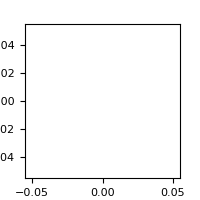

In [415]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

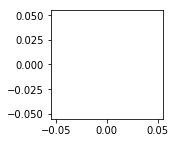

In [427]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [35]:
!ls ../../../Winds/ERA_interim/ -1 > ../../../Winds/list_files.txt

In [36]:
!ls ../../../Winds/ERA_interim/ -1

winds2004_monthly.nc
winds2005_monthly.nc
winds2006_monthly.nc
winds2007_monthly.nc
winds2008_monthly.nc
winds2009_monthly.nc
winds2010_monthly.nc
winds2011_monthly.nc
winds2012_monthly.nc
winds2013_monthly.nc
winds2014_monthly.nc
winds2015_monthly.nc
winds2016_monthly.nc
winds2017_monthly.nc


In [53]:
winds = []
with open("../../../Winds/list_files.txt") as file_list:
    for line in file_list:
        winds.append(xr.open_dataset("../../../Winds/ERA_interim/"+line.split("\n")[0]))

In [193]:
wind2004 = xr.open_dataset("../../../Winds/ERA_interim/winds2004_monthly.nc")

In [150]:
winds[5]

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 2009-01-01 2009-02-01 2009-03-01 ...
Data variables:
    u10        (time, latitude, longitude) float64 -1.433 -1.438 -1.443 ...
    v10        (time, latitude, longitude) float64 -0.6727 -0.6519 -0.6307 ...
    iews       (time, latitude, longitude) float64 0.002973 0.002973 ...
    inss       (time, latitude, longitude) float64 0.00147 0.00147 0.00147 ...
Attributes:
    Conventions: CF-1.6
    history: 2018-09-18 08:53:22 GMT by grib_to_netcdf-2.8.0: grib_to_netcdf /data/data03/scratch/4f/14/_mars-atls14-70e05f9f8ba4e9d19932f1c45a7be8d8-Atj8c_.grib -o /data/data04/scratch/8b/25/_grib2netcdf-atls12-a562cefde8a29a7288fa0b8b7f9413f7-ExUmZD.nc -utime

In [4]:
wind2004.iews.shape

(12, 241, 480)

In [6]:
def compute_stress(U):
    C_D = np.ones(U.shape) * 1.2e-3
    C_D = np.where((U > 4) & (U < 11), 1.2e-3,0.0 )
    indices = np.argwhere(((U>=11) & (U<25)))
    indrav = np.ravel(indices)
    C_D[indrav[::3], indrav[1::3], indrav[2::3]] = 1e-3* (0.49 + 0.065 * U[indrav[::3], indrav[1::3], indrav[2::3]])
    
    return C_D * 1.22 * U**2

In [378]:
def compute_stress_curl(taux, tauy):
    stress_curl = np.zeros_like(taux) #(( len(taux.time), len(taux.latitude), len(taux.longitude) ))
    time_steps = len(taux.time)
    
    dx = float(abs(taux.longitude[1] - taux.longitude[0]))
    dy = float(abs(taux.latitude[1] - taux.latitude[0]))
    
    for i in range(time_steps):
        taux_x, taux_y = np.gradient(taux[i].values, dx, dy)
        tauy_x, tauy_y = np.gradient(tauy[i].values, dx, dy)
        stress_curl[i] = tauy_x - taux_y
        
    return stress_curl

In [54]:
def compute_clim_stress_curl(winds):
    stress_curl_clim = np.zeros_like(winds[0].iews)
    iews_clim = np.zeros_like(winds[0].iews)
    inss_clim = np.zeros_like(winds[0].iews)
    tauy_x = np.zeros_like(winds[0].iews)
    taux_y = np.zeros_like(winds[0].iews)
    
    for i in range(len(winds)):
        for mon in range(12):
            iews_clim[mon] += winds[i].iews[mon].values
            inss_clim[mon] += winds[i].inss[mon].values
    for mon in range(12):
        iews_clim[mon] = iews_clim[mon] / float(len(winds))
        inss_clim[mon] = inss_clim[mon] / float(len(winds))
        
    delta_lat = abs(float(winds[0].latitude[0] - winds[0].latitude[1]))
    delta_lon = abs(float(winds[0].longitude[0] - winds[0].longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = float(r * np.deg2rad(delta_lat))
    
    for mon in range(12):
        for lati in range(len(winds[0].latitude)):
            dx = abs(float(r * np.cos(np.deg2rad(winds[0].latitude[lati]) ) * delta_lon))
            tauy_x[mon][lati, :] = np.gradient(inss_clim[mon][lati,:], dx)
        _, taux_y[mon] = np.gradient(iews_clim[mon][:, :], dx, dy )
        stress_curl_clim[mon] = tauy_x[mon] - taux_y[mon]
        
    return stress_curl_clim

In [55]:
stress_curl_clim = compute_clim_stress_curl(winds)

In [12]:
stress_curl2004 = compute_stress_curl(wind2004.iews, wind2004.inss)

In [117]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

In [118]:
mWhole = topView.createMapProjections(-90, 0, region="Whole")

In [214]:
from matplotlib import ticker, cm
def plot_scalar_field(sclr, lons, lats, m=None, bathy=None, plotBathy=True, save=False, savename="untitled.png", 
                     levs=None, drawMeridians=True, meridians=None, units=None, extend="both", cmap="coolwarm",
                     annotate=True, fontsize=8):
    plt.close(1)
    fig = plt.figure(1, figsize=(10,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 0.05])
    mapax = plt.subplot(gs[0,0])
    if(annotate == True):
        parallels = np.arange(-80, -50+1, 5.)    
        m.drawparallels(parallels,labels=[0,0,0,0], linewidth=0.2) # labels: left,right,top,bottom
        
        xy = [[-140, -55], [-140, -60] , [-140, -65], [-140, -70], [-140, -75] , [-140, -80]]
        xytext = np.arange(55, 81, 5)
        for i in range(len(xytext)):
            mxy = m(xy[i][0], xy[i][1])
            plt.annotate(str(xytext[i])+"$^o$S", xy=(mxy[0], mxy[1]), rotation=-45, fontsize=fontsize)    
            
    colorbar_ax = plt.subplot(gs[1,0])
    
    if plotBathy:
        bathycolorbar = plt.subplot(gs[0, 1])
    
    X, Y = np.meshgrid(lons, lats)
    
    if not m:
        m = topView.createMapProjections(-90, 0, region="Whole")
        
    CF = m.contourf(X, Y, sclr, ax=mapax, latlon=True, levels=levs, extend=extend, cmap=cmap, origin="lower")
    cbar1 = Colorbar(ax = colorbar_ax, mappable = CF, orientation = 'horizontal')
    cbar1.ax.set_xlabel(units)
    
    if(plotBathy == True):
        if not bathy:
            bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')
        lonlen = len(bathy.lon)
        lonindices = np.arange(0, lonlen+1, 30)
        lonindices[-1] = lonindices[-1] - 1
        bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 5))
        clevs = np.array([-100, -500, -1000, -1500, -2000, -3000])[::-1]
        
        longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
        cs = m.contour(longrid, latgrid, bathyS.elevation.where(bathyS.elevation <= 0).values,  latlon=True, 
                       levels=clevs, linewidths=0.2, extend='min', ax=mapax ) #, cmap="RdYlBu"
        cbar1 = Colorbar(ax = bathycolorbar, mappable = cs, orientation = 'vertical')
        cbar1.ax.get_children()[0].set_linewidths(5)
        cbar1.set_label('Depth (m)')
     
    m.drawcoastlines(ax=mapax)
    
    if drawMeridians:
        if not meridians:
            meridians = np.arange(-180, 180, 20)
        m.drawmeridians(meridians,labels=[1,1,1,1], linewidth=0.2, ax=mapax)
    
    if save:
        plt.savefig(savename, dpi=600)
    
    plt.show()    

In [59]:
bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')

In [147]:
np.linspace(-1e-7, 1e-7, 19)

array([ -1.00000000e-07,  -8.88888889e-08,  -7.77777778e-08,
        -6.66666667e-08,  -5.55555556e-08,  -4.44444444e-08,
        -3.33333333e-08,  -2.22222222e-08,  -1.11111111e-08,
         0.00000000e+00,   1.11111111e-08,   2.22222222e-08,
         3.33333333e-08,   4.44444444e-08,   5.55555556e-08,
         6.66666667e-08,   7.77777778e-08,   8.88888889e-08,
         1.00000000e-07])

In [219]:
winds[0].longitude - 180

<xarray.DataArray 'longitude' (longitude: 480)>
array([-180.  , -179.25, -178.5 , -177.75, -177.  , -176.25, -175.5 ,
       -174.75, -174.  , -173.25, -172.5 , -171.75, -171.  , -170.25,
       -169.5 , -168.75, -168.  , -167.25, -166.5 , -165.75, -165.  ,
       -164.25, -163.5 , -162.75, -162.  , -161.25, -160.5 , -159.75,
       -159.  , -158.25, -157.5 , -156.75, -156.  , -155.25, -154.5 ,
       -153.75, -153.  , -152.25, -151.5 , -150.75, -150.  , -149.25,
       -148.5 , -147.75, -147.  , -146.25, -145.5 , -144.75, -144.  ,
       -143.25, -142.5 , -141.75, -141.  , -140.25, -139.5 , -138.75,
       -138.  , -137.25, -136.5 , -135.75, -135.  , -134.25, -133.5 ,
       -132.75, -132.  , -131.25, -130.5 , -129.75, -129.  , -128.25,
       -127.5 , -126.75, -126.  , -125.25, -124.5 , -123.75, -123.  ,
       -122.25, -121.5 , -120.75, -120.  , -119.25, -118.5 , -117.75,
       -117.  , -116.25, -115.5 , -114.75, -114.  , -113.25, -112.5 ,
       -111.75, -111.  , -110.25, -109.5 ,

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


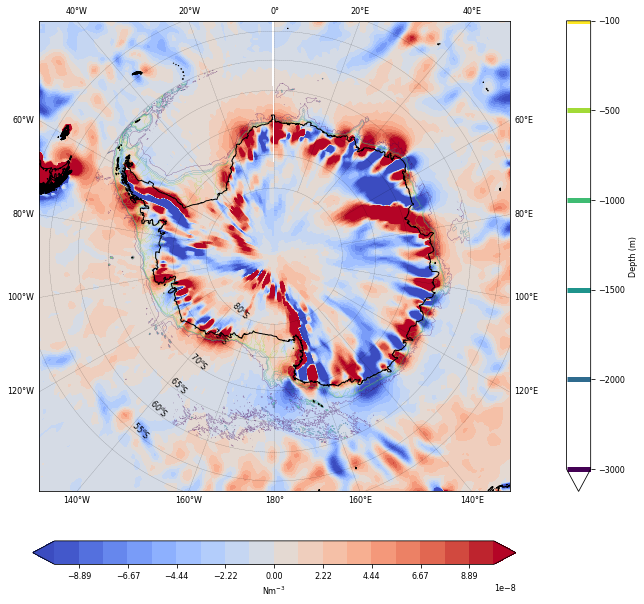

In [291]:
plot_scalar_field(np.mean(stress_curl_clim, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=np.linspace(-1e-7, 1e-7, 19), save=True, savename="./Images/wind/stress_curl_net_clim.png", 
                  drawMeridians=True, plotBathy=True, units="Nm$^{-3}$")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


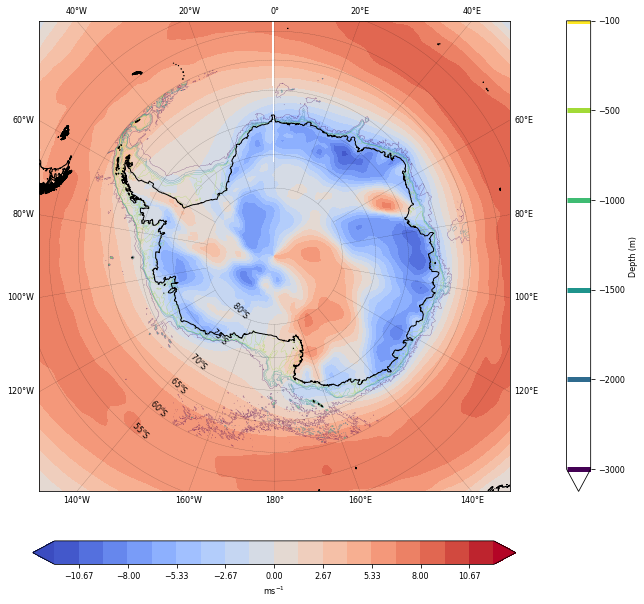

In [292]:
plot_scalar_field(np.mean(wind_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12,12,19) ), save=True, 
                  savename="./Images/wind/U10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


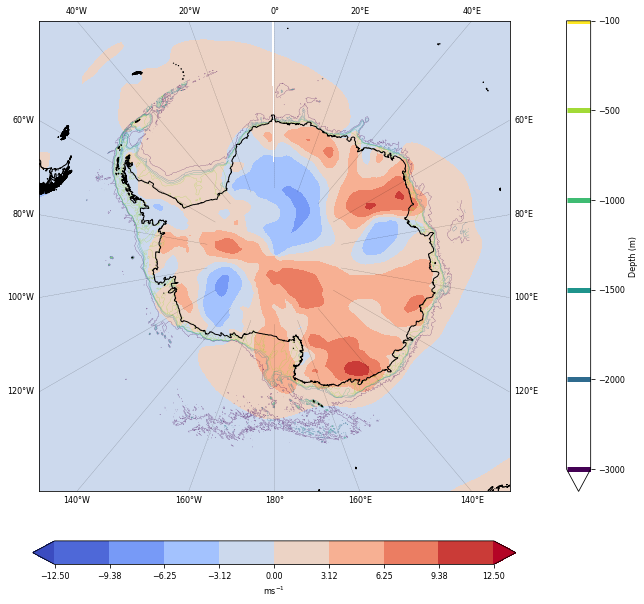

In [183]:
plot_scalar_field(np.mean(v10_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12.5,12.5,9)), 
                  save=True, savename="./Images/wind/V10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

In [7]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 30)
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [50]:
dfmg = pd.read_csv("dfmg.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [51]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

cdw = (dfmg['PSAL_ADJUSTED'] > 34.6) & (dfmg['CTEMP'] > 0)
maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25
gline_le_75km = dfmg['DIST_GLINE'] <= 75

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [52]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [53]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [54]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [55]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

<IPython.core.display.Javascript object>


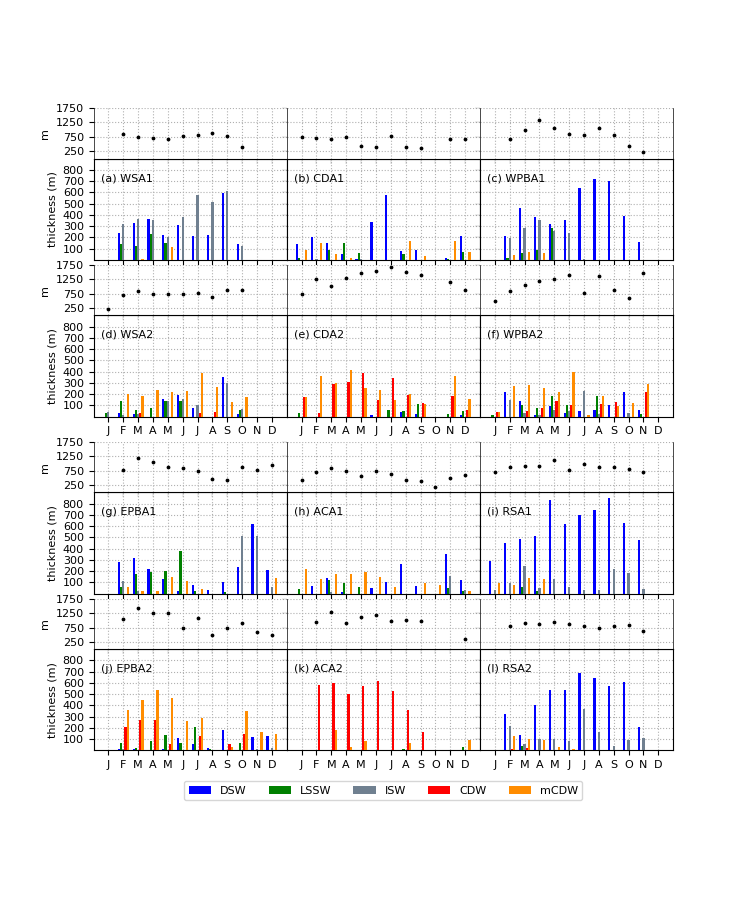

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:54: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -1.5)

In [56]:
A1 = gline_le_75km
A2 = ~gline_le_75km

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

yticks = list(np.arange(100, 820, 100))
yticks_dod = list(np.arange(250,2000,500))
DSWthickness1, lsswthickness1, ISWthickness1, mCDWthickness1, CDWthickness1, zlowest1 = pltwmthk.plot_array_waterMassThickness(dfmg,
                                                              regions1, titles1, ht=9, save=True, ymax=900,
                                                         savename="./Images/waterMassBudgets/array1.png", yticks=yticks, 
                                                            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

<IPython.core.display.Javascript object>


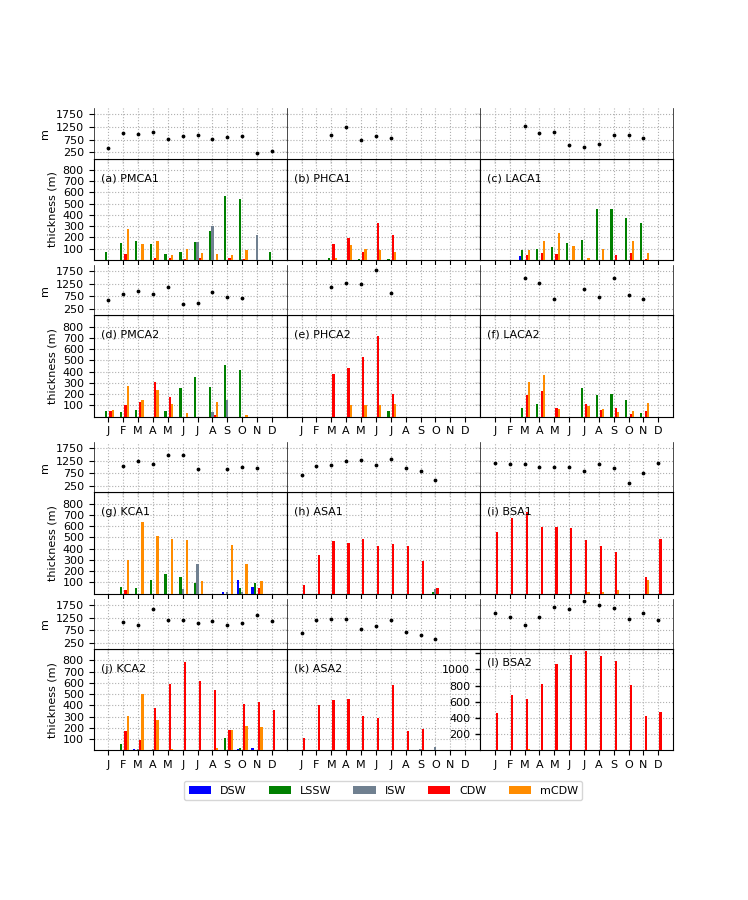

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:53: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:54: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -1.5)

In [57]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1", 
           "(d) PMCA2", "(e) PHCA2", "(f) LACA2",
           "(g) KCA1", "(h) ASA1", "(i) BSA1", 
           "(j) KCA2", "(k) ASA2", "(l) BSA2"]

yticks = list(np.arange(100, 820, 100)) 
yticks_dod = list(np.arange(250,2000,500))
DSWthickness2, lsswthickness2, ISWthickness2, mCDWthickness2, CDWthickness2, zlowest2 = pltwmthk.plot_array_waterMassThickness(dfmg, 
                                     regions2, titles2, ht=9, save=True, ymax=900, retValue = True,
                                       savename="./Images/waterMassBudgets/array2.png", yticks=yticks, 
                                       yticks_dod=yticks_dod, ymax_dod=2000)

In [58]:
DSWthickness12 = np.append(DSWthickness1.ravel(), DSWthickness2.ravel())
ISWthickness12 = np.append(ISWthickness1.ravel(), ISWthickness2.ravel())
lsswthickness12 = np.append(lsswthickness1.ravel(), lsswthickness2.ravel())
CDWthickness12 = np.append(CDWthickness1.ravel(), CDWthickness2.ravel())
mCDWthickness12 = np.append(mCDWthickness1.ravel(), mCDWthickness2.ravel())
zlowest12 = np.append(zlowest1.ravel(), zlowest2.ravel())
titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind), 
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*(len(DSWthickness1) + len(DSWthickness2)), index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

## Computing bathymetry gradient to identify the slope

In [56]:
import plot_bathymetryGradients as pbgrad

In [57]:
bathy_gradient = pbgrad.compute_bathymetryGradients()

In [60]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 5)
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [494]:
bathy_gradient = ma.masked_array(np.array(bathy_gradient))
bathy_gradient.mask = (bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)

In [62]:
XX, YY = np.meshgrid(bathyS.lon, bathyS.lat)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


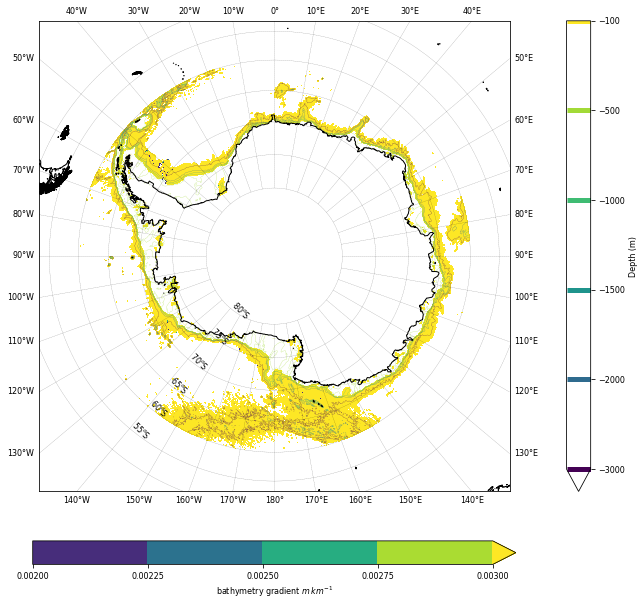

In [495]:
plot_scalar_field(bathy_gradient, bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), save=True,
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=True,
                  savename="./Images/bathygradient.png")

In [189]:
regions

array(['WSA1', 'CDA1', 'WPBA1', 'WSA2', 'CDA2', 'WPBA2', 'EPBA1', 'ACA1',
       'RSA1', 'EPBA2', 'ACA2', 'RSA2', 'PMCA1', 'PHCA1', 'LACA1', 'PMCA2',
       'PHCA2', 'LACA2', 'KCA1', 'ASA1', 'BSA1', 'KCA2', 'ASA2', 'BSA2'], dtype=object)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


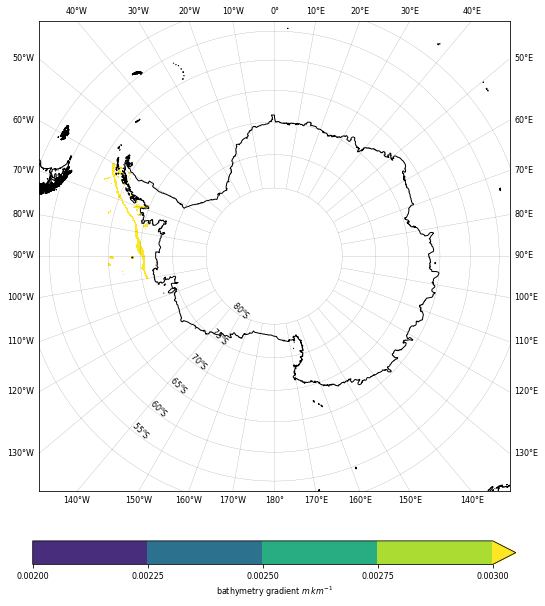

In [213]:
plot_scalar_field(ma.masked_array(np.array(bathy_gradient), mask=regionalMasks[20] ), bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), 
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=False,
                 save=True, savename="./Images/arbit.png")

In [302]:
np.rad2deg(np.deg2rad(-90))

-90.0

In [63]:
def compute_clim_monthly(winds, var="u10"):
    
    no_years = len(winds)
    
    wind_clim_monthly = [0]*12
    
    for i in range(no_years):
        for mon in range(12):
            wind_clim_monthly[mon] += winds[i][var].values[mon]
    
    for mon in range(12):
        wind_clim_monthly[mon] = wind_clim_monthly[mon] / float(no_years)
        
    return wind_clim_monthly

In [70]:
wind_clim_monthly = compute_clim_monthly(winds)

In [71]:
v10_clim_monthly = compute_clim_monthly(winds, var="v10")

In [347]:
wXX[wXX > 180] = wXX[wXX > 180] - 360

In [348]:
wXX[0]

array([   0.  ,    0.75,    1.5 ,    2.25,    3.  ,    3.75,    4.5 ,
          5.25,    6.  ,    6.75,    7.5 ,    8.25,    9.  ,    9.75,
         10.5 ,   11.25,   12.  ,   12.75,   13.5 ,   14.25,   15.  ,
         15.75,   16.5 ,   17.25,   18.  ,   18.75,   19.5 ,   20.25,
         21.  ,   21.75,   22.5 ,   23.25,   24.  ,   24.75,   25.5 ,
         26.25,   27.  ,   27.75,   28.5 ,   29.25,   30.  ,   30.75,
         31.5 ,   32.25,   33.  ,   33.75,   34.5 ,   35.25,   36.  ,
         36.75,   37.5 ,   38.25,   39.  ,   39.75,   40.5 ,   41.25,
         42.  ,   42.75,   43.5 ,   44.25,   45.  ,   45.75,   46.5 ,
         47.25,   48.  ,   48.75,   49.5 ,   50.25,   51.  ,   51.75,
         52.5 ,   53.25,   54.  ,   54.75,   55.5 ,   56.25,   57.  ,
         57.75,   58.5 ,   59.25,   60.  ,   60.75,   61.5 ,   62.25,
         63.  ,   63.75,   64.5 ,   65.25,   66.  ,   66.75,   67.5 ,
         68.25,   69.  ,   69.75,   70.5 ,   71.25,   72.  ,   72.75,
         73.5 ,   74

In [349]:
wind_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    wind_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                               wind_clim_monthly[i].flatten(), 
                                      (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [350]:
v10_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    v10_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                              v10_clim_monthly[i].flatten(), 
                                    (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [351]:
stress_curl_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    stress_curl_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                                      stress_curl_clim[i].flatten(), 
                                             (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [354]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

In [ ]:
def compute_monthly_clim_means_eachLon_slope(wind_interpd= stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ~((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean, wind_interpd[0].mask    

In [184]:
def compute_monthly_clim_means_lonlimited_slope(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ~((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean, wind_interpd[0].mask

In [585]:
def compute_monthly_clim_means_lonlimited(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ((bathyS.elevation > 0) | 
                                                            ~((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean

In [164]:
waterMassThickness["u10MonMean"] = 0
waterMassThickness["v10MonMean"] = 0

In [197]:
waterMassThickness = waterMassThickness.rename(columns={"u10MonMean":"u10SlopeMonMean", "v10MonMean":"v10SlopeMonMean"})

In [200]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'u10SlopeMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean'],
      dtype='object')

In [291]:
waterMassThickness.region.unique()

array(['WSA1', 'CDA1', 'WPBA1', 'WSA2', 'CDA2', 'WPBA2', 'EPBA1', 'ACA1',
       'RSA1', 'EPBA2', 'ACA2', 'RSA2', 'PMCA1', 'PHCA1', 'LACA1', 'PMCA2',
       'PHCA2', 'LACA2', 'KCA1', 'ASA1', 'BSA1', 'KCA2', 'ASA2', 'BSA2'], dtype=object)

In [422]:
waterMassThickness["stress_curl_slope_MonMean"] = 0.0

In [225]:
import re

In [233]:
np.array(regions, dtype=str)

array(['WSA1', 'CDA1', 'WPBA1', 'WSA2', 'CDA2', 'WPBA2', 'EPBA1', 'ACA1',
       'RSA1', 'EPBA2', 'ACA2', 'RSA2', 'PMCA1', 'PHCA1', 'LACA1', 'PMCA2',
       'PHCA2', 'LACA2', 'KCA1', 'ASA1', 'BSA1', 'KCA2', 'ASA2', 'BSA2'], 
      dtype='<U5')

In [282]:
regions = np.array(waterMassThickness.region.unique(), dtype=str)

['WS', '']

In [319]:
wmA1regions = waterMassThickness.region.str.contains("A1")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()
for r in regionsA1:
    print(r, re.split("A[0-9]", r)[0]+"A2")

WSA1 WSA2
CDA1 CDA2
WPBA1 WPBA2
EPBA1 EPBA2
ACA1 ACA2
RSA1 RSA2
PMCA1 PMCA2
PHCA1 PHCA2
LACA1 LACA2
KCA1 KCA2
ASA1 ASA2
BSA1 BSA2


In [321]:
waterMassThickness.loc[wmA1regions, "region"].unique()

array(['WSA1', 'CDA1', 'WPBA1', 'EPBA1', 'ACA1', 'RSA1', 'PMCA1', 'PHCA1',
       'LACA1', 'KCA1', 'ASA1', 'BSA1'], dtype=object)

In [575]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth'],
      dtype='object')

In [586]:
wmA1regions = waterMassThickness.region.str.contains("A1")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-77., -72], [-68., -66.47], [-69.75, -66.35],
                   [-69.75, -65.215], [-67.25, -65.4], [-78., -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-72.5, -69], [-70.5, -65.38], [-67., -65.56], 
                   [-67., -64.5], [-75.25, -70.7], [-74., -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == re.split("A[0-9]", regionsA1[i] )[0]+"A2" )
    
    u10MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0],regionsLonlim[i][1]], 
                                                       [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=wind_clim_monthly_interpd)
    
    v10_MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0], regionsLonlim[i][1]],
                                                        [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=v10_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10MonMean"] = u10MonMean
    waterMassThickness.loc[wmRegionMaskA2, "u10MonMean"] = u10MonMean
    
    waterMassThickness.loc[wmRegionMaskA1, "v10MonMean"] = v10_MonMean
    waterMassThickness.loc[wmRegionMaskA2, "v10MonMean"] = v10_MonMean

In [496]:
wmA1regions = waterMassThickness.region.str.contains("A1")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],
                   [-66.9, -65.215], [-66, -65.4], [-73.45, -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56], 
                   [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == re.split("A[0-9]", regionsA1[i] )[0]+"A2" )
    
    u10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]], 
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=wind_clim_monthly_interpd)
    v10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=v10_clim_monthly_interpd)
    windStressCurl_MonMeanRegional, regionalMasks[i] = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=stress_curl_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10SlopeMonMean"] = u10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "u10SlopeMonMean"] = u10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "v10SlopeMonMean"] = v10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "v10SlopeMonMean"] = v10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    
waterMassThickness["neg_u10SlopeMonMean"] = -waterMassThickness.u10SlopeMonMean
waterMassThickness["neg_stress_curl"] = -waterMassThickness.stress_curl_slope_MonMean

In [587]:
play_beep()

In [501]:
waterMassThickness.to_csv("waterMassThickness_v2.csv")

In [5]:
coldRegimeRegionsA1 = ["WSA1", 'CDA1', "WPBA1", "EPBA1", 'ACA1', "RSA1"]
coldRegimeRegionsA2 = ["WSA2", 'CDA2', "WPBA2", "EPBA2", 'ACA2', "RSA2"]

coldRegimeWideShelfRegionsA1 = ["WSA1", "WPBA1", "EPBA1", "RSA1"]
coldRegimeWideShelfRegionsA2 = ["WSA2", "WPBA2", "EPBA2", "RSA2"]

coldRegimeNarrowShelfRegionsA1 = ["CDA1", "ACA1"]
coldRegimeNarrowShelfRegionsA2 = ["CDA2", "ACA2"]

lsswRegimeRegionsA1 = ["PMCA1", "LACA1", "KCA1"]
lsswRegimeRegionsA2 = ["PMCA2", "LACA2", "KCA2"]

warmRegimeRegionsA1 = ["PHCA1", "ASA1", "BSA1"]
warmRegimeRegionsA2 = ["PHCA2", "ASA2", "BSA2"]

In [65]:
waterMassThickness.loc[wmColdRegimeMaskA1, "CDW"].count()

64

In [89]:
waterMassThickness["allCDW"] = waterMassThickness.CDW + waterMassThickness.mCDW

In [355]:
count = np.zeros(8)

coldRegimeCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeRegionsA1)].corr()

wmColdRegimeMaskA2 = waterMassThickness.region.isin(coldRegimeRegionsA2)
coldRegimeCorrA2 = waterMassThickness.loc[wmColdRegimeMaskA2].corr()

wmColdRegimeWideShelfMaskA1 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)
coldRegime_WideShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)].corr()
count[0] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1), "CDW"].count()

wmColdRegimeWideShelfMaskA2 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)
coldRegime_WideShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)].corr()
count[4] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2), "CDW"].count()

wmColdRegimeNarrowShelfMaskA1 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)
coldRegime_NarrowShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)].corr()
count[1] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1), "CDW"].count()

wmColdRegimeNarrowShelfMaskA2 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)
coldRegime_NarrowShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)].corr()

wmLSSWRegimeMaskA1 = waterMassThickness.region.isin(lsswRegimeRegionsA1)
lsswRegimeCorrA1 = waterMassThickness.loc[wmLSSWRegimeMaskA1].corr()

wmLSSWRegimeMaskA2 = waterMassThickness.region.isin(lsswRegimeRegionsA2)
lsswRegimeCorrA2= waterMassThickness.loc[wmLSSWRegimeMaskA2].corr()

wmWarmRegimeMaskA1 = waterMassThickness.region.isin(warmRegimeRegionsA1)
warmRegimeCorrA1 = waterMassThickness.loc[wmWarmRegimeMaskA1].corr()

wmWarmRegimeMaskA2 = waterMassThickness.region.isin(warmRegimeRegionsA2)
warmRegimeCorrA2 = waterMassThickness.loc[wmWarmRegimeMaskA2].corr()

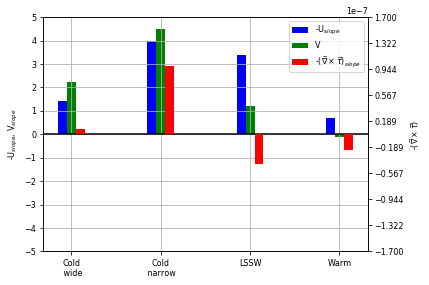

In [595]:
regionMasks = [wmColdRegimeWideShelfMaskA1, wmColdRegimeNarrowShelfMaskA1, wmLSSWRegimeMaskA1, wmWarmRegimeMaskA1]
regimes = ["cold, wide  ", "cold, narrow", "Intermediate", "Warm regime "]
plt.close(1)
fig = plt.figure(1)
ax = plt.subplot()
axr = ax.twinx()
for i in range(len(regionMasks)):
    if(i == 0):
        label = ["-U$_{slope}$", "V", "-$( \\vec{\\nabla} \\times \\vec{\\tau} )_{slope}$"]
    else:
        label = [None]*3
    wth = 0.1
    lns1 = ax.bar(i+1 - 1.*wth, -waterMassThickness.loc[regionMasks[i], "u10SlopeMonMean"].mean(), width=wth, 
           color='b', label= label[0])
    lns2 = ax.bar(i+1 - 0*wth, waterMassThickness.loc[regionMasks[i], "v10MonMean"].mean(), width=wth, 
           color='g', label= label[1])
    lns3 = axr.bar(i+1 + 1.*wth, -waterMassThickness.loc[regionMasks[i], "stress_curl_slope_MonMean"].mean(),width=wth, 
            color='r', label= label[2])
    if(i == 0):
        lns = list(lns1+lns2+lns3).copy()
        labs = [l.get_label() for l in lns]
        ax.legend(lns, label)
        
ax.set_ylim(-5, 5)    
ax.set_yticks(np.arange(-5, 6, 1) )
ax.axhline(y=0, color='k')
axr.set_ylim(-1.7e-7, 1.7e-7)
axr.set_yticks(np.linspace(-1.7e-7, 1.7e-7, 10) )
ax.set_xticks(np.arange(1,5,1))
ax.set_xticklabels(["Cold\n wide", "Cold\n narrow", "LSSW", "Warm"])
ax.grid()
ax.set_ylabel("-U$_{slope}$, V$_{slope}$")
axr.set_ylabel("-$( \\vec{\\nabla} \\times \\vec{\\tau} )$")
plt.tight_layout()
plt.savefig("./Images/wind/magnitudes_regimeMean.png", dpi=600)
plt.show()

In [14]:
stats.pearsonr(waterMassThickness.DSW.dropna(), waterMassThickness.CDW.dropna())

(-0.39573656783839495, 2.1975432131324102e-10)

In [6]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.nan_to_num(np.tanh((lo_z, hi_z)))
    return r, round(p,4), lo, hi, np.nan_to_num(np.array([lo,hi]))

In [7]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    yerr = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            yerr[r][c] = [(rvalues[r][c] - CI_lo[r][c]), (CI_hi[r][c] - rvalues[r][c]) ]
            #1-round(pearsonr(df[r], df[c])[1], 4)
    yerr = yerr.fillna(-1e10)
    print(type(yerr))
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
        if(retValue == "yerr"):
            return yerr.fillna(1e10)
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [19]:
A1regions = waterMassThickness.region.str.contains("A1")
calculate_pvalues(waterMassThickness.loc[A1regions].dropna(), retValue="r")

<class 'pandas.core.frame.DataFrame'>


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest,windMonMean,v10SlopeMonMean,u10SlopeMonMean,u10MonMean,v10MonMean,stress_curl_slope_MonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
CDW,1,-0.380711,-0.241514,-0.232402,-0.232021,-0.118851,-0.418487,-0.23987,-0.597374,0.528291,-0.0822392,-0.0649414,0.224215,-0.528291,-0.224215,-0.108468
DSW,-0.380711,1,0.387404,-0.248698,-0.313331,0.0806473,0.0121461,0.454391,0.580323,0.158709,0.360129,0.310715,-0.330604,-0.158709,0.330604,0.564606
ISW,-0.241514,0.387404,1,-0.0592114,-0.210471,0.0727881,0.0146151,0.230892,-0.00544406,0.163238,-0.112659,-0.05466,0.0477302,-0.163238,-0.0477302,0.621498
LSSW,-0.232402,-0.248698,-0.0592114,1,0.227322,0.0308044,-0.134684,0.108341,-0.0938748,-0.362351,-0.114261,-0.0596474,0.373869,0.362351,-0.373869,-0.182249
mCDW,-0.232021,-0.313331,-0.210471,0.227322,1,-0.170284,-0.321464,-0.095861,0.0466559,-0.331254,-0.0305707,-0.0942846,0.0105689,0.331254,-0.0105689,-0.30688
month,-0.118851,0.0806473,0.0727881,0.0308044,-0.170284,1,0.33784,-0.0109718,-0.0813075,-0.0522347,-0.113381,-0.146119,0.0367518,0.0522347,-0.0367518,-0.0348206
zlowest,-0.418487,0.0121461,0.0146151,-0.134684,-0.321464,0.33784,1,-0.0648646,0.193325,-0.259363,-0.0916053,-0.0851395,-0.184509,0.259363,0.184509,0.00209352
windMonMean,-0.23987,0.454391,0.230892,0.108341,-0.095861,-0.0109718,-0.0648646,1,0.0982892,0.202413,0.343501,-0.158021,0.325374,-0.202413,-0.325374,0.517463
v10SlopeMonMean,-0.597374,0.580323,-0.00544406,-0.0938748,0.0466559,-0.0813075,0.193325,0.0982892,1,-0.358254,0.29455,0.564391,-0.674192,0.358254,0.674192,0.099076
u10SlopeMonMean,0.528291,0.158709,0.163238,-0.362351,-0.331254,-0.0522347,-0.259363,0.202413,-0.358254,1,0.31349,-0.072651,0.0773159,-1,-0.0773159,0.475618


In [23]:
calculate_pvalues(waterMassThickness.groupby('region').mean().dropna(), retValue="r")

<class 'pandas.core.frame.DataFrame'>


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest,windMonMean,v10SlopeMonMean,u10SlopeMonMean,u10MonMean,v10MonMean,stress_curl_slope_MonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
CDW,1,-0.500209,-0.411854,-0.445094,-0.262879,NaN,-0.746759,-0.342995,-0.484607,0.323004,-0.0587334,-0.219761,0.0514902,-0.323004,-0.0514902,-0.274071
DSW,-0.500209,1,0.593655,-0.211155,-0.322696,NaN,0.370948,0.465075,0.573702,0.2557,0.525936,0.32221,-0.25861,-0.2557,0.25861,0.56273
ISW,-0.411854,0.593655,1,0.00923221,-0.237797,NaN,0.333892,0.338278,0.109808,0.262615,-0.0108485,0.000686611,-0.00577848,-0.262615,0.00577848,0.71577
LSSW,-0.445094,-0.211155,0.00923221,1,0.294917,NaN,0.266156,0.239591,-0.172934,-0.446252,-0.165837,-0.0586346,0.515785,0.446252,-0.515785,-0.203357
mCDW,-0.262879,-0.322696,-0.237797,0.294917,1,NaN,-0.215752,0.0661549,0.16573,-0.47771,-0.292838,0.0967407,0.0293299,0.47771,-0.0293299,-0.154043
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zlowest,-0.746759,0.370948,0.333892,0.266156,-0.215752,NaN,1,0.0961449,0.265893,-0.0923306,0.0556332,0.0333201,-0.124881,0.0923306,0.124881,0.238787
windMonMean,-0.342995,0.465075,0.338278,0.239591,0.0661549,NaN,0.0961449,1,0.166194,0.137359,0.293326,-0.0392339,0.264437,-0.137359,-0.264437,0.524423
v10SlopeMonMean,-0.484607,0.573702,0.109808,-0.172934,0.16573,NaN,0.265893,0.166194,1,-0.341535,0.406727,0.595195,-0.731004,0.341535,0.731004,0.0655796
u10SlopeMonMean,0.323004,0.2557,0.262615,-0.446252,-0.47771,NaN,-0.0923306,0.137359,-0.341535,1,0.222217,-0.0482048,0.0740568,-1,-0.0740568,0.493183


In [517]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

In [1]:
waterMassThickness = pd.read_csv("waterMassThickness_v2.csv")
del(waterMassThickness["Unnamed: 0"])

NameError: name 'pd' is not defined

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:759: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


triggered lo
triggered lo
triggered hi
triggered hi
triggered hi
triggered hi
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered hi
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered hi
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo

triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered hi
triggered lo
triggered hi
triggered hi
triggered hi
triggered lo
triggered hi
triggered lo
triggered hi
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered lo
triggered hi
triggered hi
triggered lo
triggered hi
triggered hi
triggered lo
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered hi
triggered hi
triggered hi
triggered hi
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered lo
triggered hi
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered hi
triggered lo
triggered lo
triggered hi
triggered hi
triggered hi
triggered hi
triggered lo
triggered hi
triggered hi
triggered lo
triggered lo
triggered hi
triggered lo
triggered hi
triggered hi
triggered hi
triggered hi

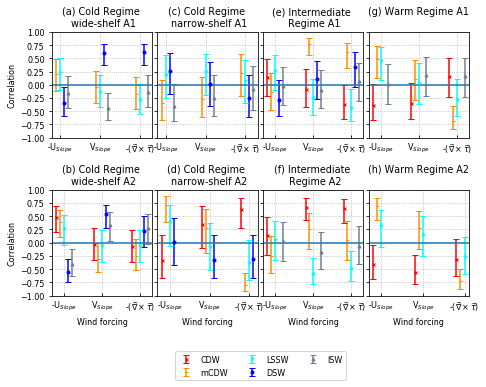

In [514]:
pltwmthk.plot_WaterMass_Correlation_byRegime_CI(waterMassThickness, save=True, 
                                                savename="./Images/waterMassBudgets/waterMassCorrelations_masked.eps" , 
                                                maskInsignificant=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:759: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


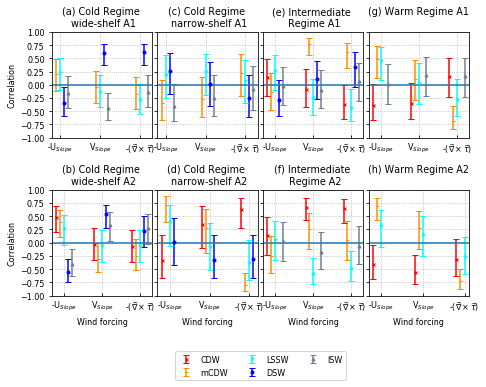

In [515]:
pltwmthk.plot_WaterMass_Correlation_byRegime_CI(waterMassThickness, save=True, 
                                                savename="./Images/waterMassBudgets/waterMassCorrelations.eps" , 
                                                maskInsignificant=False)

In [516]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth'],
      dtype='object')

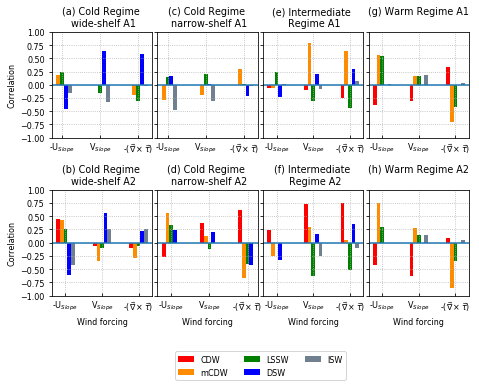

In [387]:
count = np.zeros(8)

coldRegimeCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeRegionsA1)].corr()

wmColdRegimeMaskA2 = waterMassThickness.region.isin(coldRegimeRegionsA2)
coldRegimeCorrA2 = waterMassThickness.loc[wmColdRegimeMaskA2].corr()

wmColdRegimeWideShelfMaskA1 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)
coldRegime_WideShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)].corr()
count[0] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1), "CDW"].count()

wmColdRegimeWideShelfMaskA2 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)
coldRegime_WideShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)].corr()
count[4] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2), "CDW"].count()

wmColdRegimeNarrowShelfMaskA1 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)
coldRegime_NarrowShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)].corr()
count[1] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1), "CDW"].count()

wmColdRegimeNarrowShelfMaskA2 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)
coldRegime_NarrowShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)].corr()

wmLSSWRegimeMaskA1 = waterMassThickness.region.isin(lsswRegimeRegionsA1)
lsswRegimeCorrA1 = waterMassThickness.loc[wmLSSWRegimeMaskA1].corr()

wmLSSWRegimeMaskA2 = waterMassThickness.region.isin(lsswRegimeRegionsA2)
lsswRegimeCorrA2= waterMassThickness.loc[wmLSSWRegimeMaskA2].corr()

wmWarmRegimeMaskA1 = waterMassThickness.region.isin(warmRegimeRegionsA1)
warmRegimeCorrA1 = waterMassThickness.loc[wmWarmRegimeMaskA1].corr()

wmWarmRegimeMaskA2 = waterMassThickness.region.isin(warmRegimeRegionsA2)
warmRegimeCorrA2 = waterMassThickness.loc[wmWarmRegimeMaskA2].corr()

regimeCorrArr = [coldRegime_WideShelfCorrA1, coldRegime_NarrowShelfCorrA1, lsswRegimeCorrA1, warmRegimeCorrA1,
                 coldRegime_WideShelfCorrA2, coldRegime_NarrowShelfCorrA2, lsswRegimeCorrA2, warmRegimeCorrA2]
titles = ["(a) Cold Regime \n wide-shelf A1", "(c) Cold Regime \n narrow-shelf A1", "(e) Intermediate \n Regime A1", "(g) Warm Regime A1\n",
          "(b) Cold Regime \n wide-shelf A2", "(d) Cold Regime \n narrow-shelf A2", "(f) Intermediate \n Regime A2", "(h) Warm Regime A2\n"]
pltwmthk.plot_WaterMass_Correlation_byRegime(regimeCorrArr, titles=titles, save=True, 
                                             savename="./Images/regime_WM_Corr_v2.png")

In [364]:
waterMassThickness.DSW.corr(waterMassThickness.u10SlopeMonMean)

0.26449887272153771

In [331]:
waterMassThickness2 = pd.read_csv("WRONG_waterMassThickness.csv")

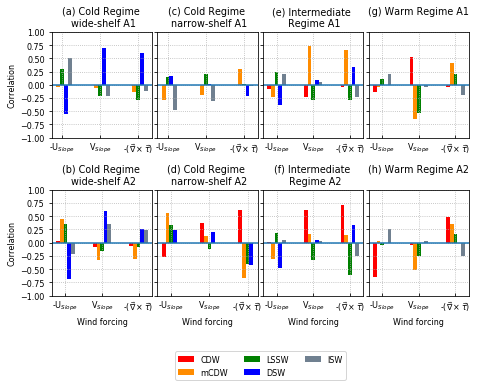

In [414]:
count = np.zeros(8)

coldRegimeCorrA1 = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeRegionsA1)].corr()

wmColdRegimeMaskA2 = waterMassThickness2.region.isin(coldRegimeRegionsA2)
coldRegimeCorrA2 = waterMassThickness2.loc[wmColdRegimeMaskA2].corr()

wmColdRegimeWideShelfMaskA1 = waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA1)
coldRegime_WideShelfCorrA1 = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA1)].corr()
count[0] = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA1), "CDW"].count()

wmColdRegimeWideShelfMaskA2 = waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA2)
coldRegime_WideShelfCorrA2 = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA2)].corr()
count[4] = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeWideShelfRegionsA2), "CDW"].count()

wmColdRegimeNarrowShelfMaskA1 = waterMassThickness2.region.isin(coldRegimeNarrowShelfRegionsA1)
coldRegime_NarrowShelfCorrA1 = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeNarrowShelfRegionsA1)].corr()
count[1] = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeNarrowShelfRegionsA1), "CDW"].count()

wmColdRegimeNarrowShelfMaskA2 = waterMassThickness2.region.isin(coldRegimeNarrowShelfRegionsA2)
coldRegime_NarrowShelfCorrA2 = waterMassThickness2.loc[waterMassThickness2.region.isin(coldRegimeNarrowShelfRegionsA2)].corr()

wmLSSWRegimeMaskA1 = waterMassThickness2.region.isin(lsswRegimeRegionsA1)
lsswRegimeCorrA1 = waterMassThickness2.loc[wmLSSWRegimeMaskA1].corr()

wmLSSWRegimeMaskA2 = waterMassThickness2.region.isin(lsswRegimeRegionsA2)
lsswRegimeCorrA2= waterMassThickness2.loc[wmLSSWRegimeMaskA2].corr()

wmWarmRegimeMaskA1 = waterMassThickness2.region.isin(warmRegimeRegionsA1)
warmRegimeCorrA1 = waterMassThickness2.loc[wmWarmRegimeMaskA1].corr()

wmWarmRegimeMaskA2 = waterMassThickness2.region.isin(warmRegimeRegionsA2)
warmRegimeCorrA2 = waterMassThickness2.loc[wmWarmRegimeMaskA2].corr()

regimeCorrArr = [coldRegime_WideShelfCorrA1, coldRegime_NarrowShelfCorrA1, lsswRegimeCorrA1, warmRegimeCorrA1,
                 coldRegime_WideShelfCorrA2, coldRegime_NarrowShelfCorrA2, lsswRegimeCorrA2, warmRegimeCorrA2]
titles = ["(a) Cold Regime \n wide-shelf A1", "(c) Cold Regime \n narrow-shelf A1", "(e) Intermediate \n Regime A1", "(g) Warm Regime A1\n",
          "(b) Cold Regime \n wide-shelf A2", "(d) Cold Regime \n narrow-shelf A2", "(f) Intermediate \n Regime A2", "(h) Warm Regime A2\n"]
pltwmthk.plot_WaterMass_Correlation_byRegime(regimeCorrArr, titles=titles, save=True, 
                                             savename="./Images/regime_WM_Corr.png")

In [ ]:
def compute_monthly_clim_means_lonlimited_slope(lonlim, latlim, wind_interpd = wind_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ((bathy_gradient.mask) |
                                                            ~((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean

In [321]:
np.array(wind_clim_monthly_interpd[0]).shape

(3600, 8641)

In [326]:
len(bathyS.lon)

8641

In [372]:
def plot_lonlat_limited_winds(lonlim, latlim, wind_interpd = wind_clim_monthly_interpd[0], XX=XX, YY=YY):
    mask = np.zeros_like(np.array(wind_interpd), dtype=bool)
    
    for i in range(len(lonlim)):
        mask = mask | ((~bathy_gradient.mask) &
                       ((XX > lonlim[i][0]) & (XX < lonlim[i][1]) & (YY > latlim[i][0])
                                                              & (YY < latlim[i][1])) ) #
    wind_interpd = ma.masked_array(np.array(wind_interpd), mask= ~mask)
    
    plot_scalar_field(wind_interpd, bathyS.lon, bathyS.lat, m=mWhole, levs=np.linspace(0, 0.05, 20), 
                  meridians=list(np.arange(-180, 180, 10)) )
    

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


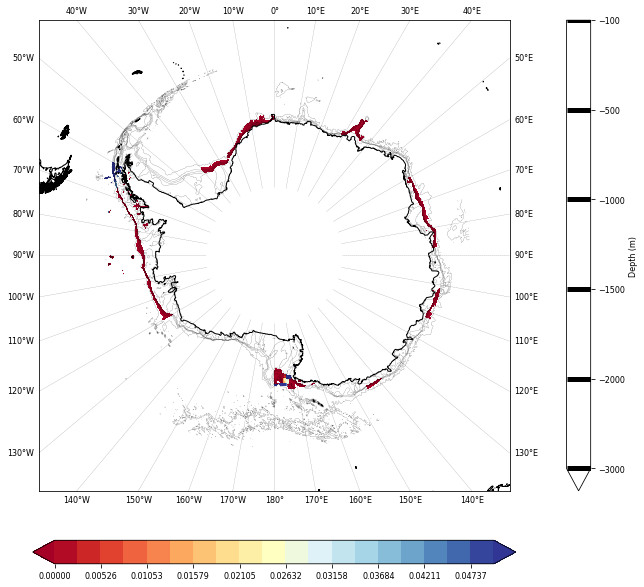

In [539]:
plot_lonlat_limited_winds(regionsLonLim, regionsLatlim)

## Computing the distance from ice shelf break to the shelf break

Function which returns a mask on the bathyS grid which selects points that are 
1. on the slope 
2. within the lon limits of the regions being studied
3. within lat limits to avoid points from on the shelf being selected

In [15]:
def compute_lonlat_limited_mask(lonlim, latlim, XX=XX, YY=YY):
    mask = np.zeros_like(np.array(XX), dtype=bool)
    
    mask = ((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) )) #& (YY > latlim[0]) & (YY < latlim[1])) ) #
    return mask

In [712]:
def compute_lonlat_limited_mask_whole(lonlim, latlim, wind_interpd = wind_clim_monthly_interpd[0], XX=XX, YY=YY):
    mask = np.zeros_like(np.array(wind_interpd), dtype=bool)
    
    for i in range(len(lonlim)):
        mask = mask | ((~bathy_gradient.mask) &
                       ((XX > lonlim[i][0]) & (XX < lonlim[i][1]) & (YY > latlim[i][0])
                                                              & (YY < latlim[i][1])) ) #
    return mask

In [745]:
lonlat_limited_mask_whole = compute_lonlat_limited_mask_whole(regionsLonLim, regionsLatlim)

iceShelfBreakLine is the polyline with points along the ice shelf break

In [617]:
iceShelfBreakLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntIceShelfEdge/ne_10m_antarctic_ice_shelves_lines.shp")
grndLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp")

In [618]:
grndLine = grndLine.to_crs({"init":"epsg:3031"})
iceShelfBreakLine = iceShelfBreakLine.to_crs({"init":"epsg:3031"})

In [619]:
isGLPoints = []
for i in range(len(iceShelfBreakLine)):
    try:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i].coords)
    except:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i][0].coords)
for i in range(len(grndLine) ):
    isGLPoints = isGLPoints + list(grndLine.geometry[i].exterior.coords)

In [615]:
isGLPoints

NameError: name 'isGLPoints' is not defined

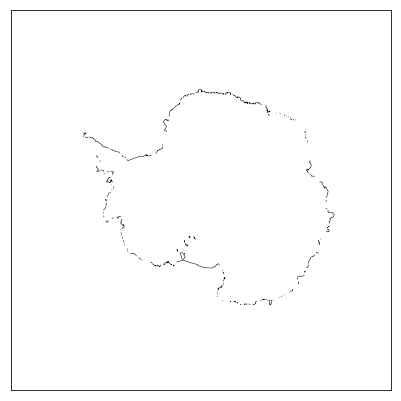

In [657]:
plt.close(1)
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot()

mWhole.readshapefile("/media/data/Datasets/Shapefiles/AntIceShelfEdge/ne_10m_antarctic_ice_shelves_lines", "ne_10m_antarctic_ice_shelves_lines")
plt.show()

In [22]:
def distance(s_lng, s_lat, e_lng, e_lat):
    
    # approximate radius of earth in km
    R = 6371.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2.0)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2.0)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [ ]:
def find_closest_index(poly_points, points_on_slope):
    closest_gl_point_ind = np.zeros(len(poly_points))
    for i in range(len(poly_points)):
        

In [33]:
from scipy.spatial.distance import cdist
from haversine import haversine
from pyproj import Proj
from scipy import spatial

polyTree = spatial.KDTree(list(grndLine.geometry[0].exterior.coords) + list(grndLine.geometry[1].exterior.coords) )

0 7046
1 1513
2 1018
3 2464
4 1242
5 16259
6 3051
7 1857
8 1915
9 2129
10 3825
11 4381


In [91]:
ishelfBreakPoints = np.array(ishelfBreakPoints)
iceShelfTree = spatial.KDTree(ishelfBreakPoints)

In [127]:
isGLTree = spatial.KDTree(isGLPoints)

In [102]:
import mpl_toolkits.basemap.pyproj as pyproj

In [128]:
utmAnt = pyproj.Proj("+init=EPSG:3031")

In [105]:
points_on_slope[0]

array([-84.07916667, -73.4625    ])

In [106]:
p1 = Point(utmAnt(points_on_slope[0][0], points_on_slope[0][1]))

In [109]:
list(p1.coords)

[(-9359650.019656112, -12301941.581939349)]

In [101]:
p1 = Point(utmAnt(points_on_slope[0]))
p1.crs = {'init':'4326'}
p1.to_crs({"init":"epsg:3857"})

AttributeError: 'Point' object has no attribute 'to_crs'

In [100]:
p1.crs

{'init': '4326'}

In [129]:
regionsList = np.array(["WS", "CD", "WPB", "EPB", "AC", "RS", "PMC", "PHC", "LAC", "KC", "AS", "BS"])
regionsLonLim = np.array([[-40, -20], [60, 70], [70,75], [75,82], [135,145], [160,180], [-20, 0], [29, 37], [82, 87], 
                 [101, 112], [-120, -100], [-100, -60] ])

regionsLatLim = np.array([[-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],  [-90, +90], [-66, -65.4], [-73.45, -70],
                 [-90, 90], [-69.44, -65.38], [-90, 90],[-65.55, -64.5], [-72.7, -70.7], [-71, -61.4] ])

mean_shelf_width = np.zeros(len(regionsLonLim))



for i in range(len(regionsLonLim)):
    lonLatLimitedMask = compute_lonlat_limited_mask(regionsLonLim[i], regionsLatLim[i])
    
    points_on_slope = np.array([XX[lonLatLimitedMask].flatten(), YY[lonLatLimitedMask].flatten()]).T
    
    for j in range(len(points_on_slope) ):
        points_on_slope[j] = Point(utmAnt(points_on_slope[j][0], points_on_slope[j][1]))
        
    mean_shelf_width[i] = np.nansum(isGLTree.query(points_on_slope)[0]) / float(len(points_on_slope) )
    print(regionsList[i], len(points_on_slope), mean_shelf_width[i])

WS 70458 530862.703948
CD 15129 125355.354934
WPB 10174 225237.557263
EPB 24634 514863.615774
AC 12419 132970.942569
RS 162585 371035.168133
PMC 30504 74819.6959651
PHC 18568 182317.158126
LAC 19149 471732.686524
KC 21287 120646.935907
AS 38244 158757.367046
BS 43806 196513.125698


In [761]:
regionsList = np.array(["WS", "CD", "WPB", "EPB", "AC", "RS", "PMC", "PHC", "LAC", "KC", "AS", "BS"])

#### LAC is too high, measuring from Google Earth for each degree meridian, we get the following distances, and we mean them to get the mean LAC shelf width

In [136]:
shelf_width_LAC = np.array([232.5, 209, 175, 135, 147, 125])*1e3

mean_shelf_width[8] = np.array(shelf_width_LAC).mean()

#### EPB is too high, measuring from Google Earth for each degree meridian, we get the following distances, and we mean them to get the mean EPB shelf width

In [139]:
shelf_width_EPB = np.array([225., 200, 170,170,175,210,220,220]) * 1e3

mean_shelf_width[3] = np.array(shelf_width_EPB).mean()

In [140]:
list(zip(list(mean_shelf_width/1e3), list(regionsList)))

[(530.86270394845246, 'WS'),
 (125.35535493420969, 'CD'),
 (225.23755726335469, 'WPB'),
 (198.75, 'EPB'),
 (132.97094256864992, 'AC'),
 (371.03516813290662, 'RS'),
 (74.819695965052446, 'PMC'),
 (182.31715812644669, 'PHC'),
 (170.58333333333334, 'LAC'),
 (120.64693590723402, 'KC'),
 (158.75736704579055, 'AS'),
 (196.51312569826575, 'BS')]

In [781]:
mean_shelf_width[5] = mean_shelf_width1[5]

In [143]:
waterMassThickness["ShelfWidth"] = 0.0
for i in range(len(regionsList)):
    maskRegions = (waterMassThickness.region == regionsList[i]+"A1")
    maskRegions = maskRegions | (waterMassThickness.region == regionsList[i]+"A2")
    
    waterMassThickness.loc[maskRegions, "ShelfWidth"] = mean_shelf_width[i] / 1e3

In [144]:
waterMassThickness.to_csv("./waterMassThickness.csv")

In [145]:
waterMassThicknessA1 = waterMassThickness[waterMassThickness.region.str.contains("A1")]
waterMassThicknessA2 = waterMassThickness[waterMassThickness.region.str.contains("A2")]

In [151]:
print(waterMassThicknessA1["DSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["DSW"].corr(waterMassThickness["ShelfWidth"]))

0.563506398452 , 0.49933005317


In [152]:
print(waterMassThicknessA1["CDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["CDW"].corr(waterMassThickness["ShelfWidth"]))

-0.0977158833129 , -0.309926332928


In [153]:
print(waterMassThicknessA1["mCDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["mCDW"].corr(waterMassThickness["ShelfWidth"]))

-0.289574324569 , 0.0633157723345


In [154]:
print(waterMassThicknessA1["LSSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["LSSW"].corr(waterMassThickness["ShelfWidth"]))

-0.161606460375 , -0.0992742409511


In [155]:
print(waterMassThicknessA1["ISW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["ISW"].corr(waterMassThickness["ShelfWidth"]))

0.607442126768 , 0.531502667064


$- (\vec{\nabla} \times \vec{\tau})$

In [59]:
waterMassThickness.loc[:, "CDW"].count()

239

In [60]:
waterMassThickness.count()

CDW                          239
DSW                          239
ISW                          239
LSSW                         239
mCDW                         239
month                        288
region                       288
zlowest                      239
windMonMean                  288
v10SlopeMonMean              288
u10SlopeMonMean              288
u10MonMean                   288
v10MonMean                   288
stress_curl_slope_MonMean    288
neg_u10SlopeMonMean          288
neg_stress_curl              288
ShelfWidth                   288
dtype: int64

In [111]:
waterMassThickness.loc[(waterMassThickness.region == "BSA1" ), "CDW"].mean()

468.3333333333333

In [368]:
np.unique(waterMassThickness.neg_stress_curl + waterMassThickness.stress_curl_slope_MonMean)

array([ 0.])

In [365]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth'],
      dtype='object')

In [562]:
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:759: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


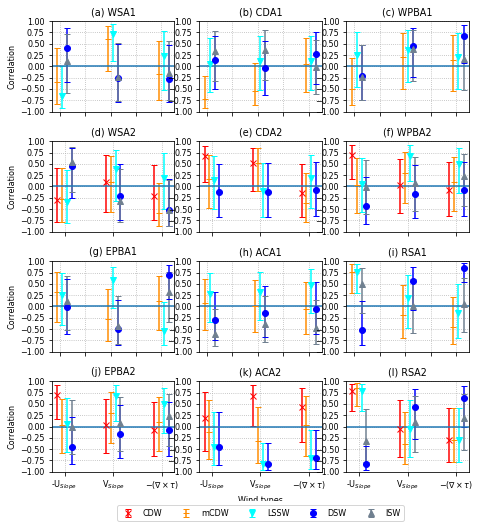

In [557]:
regions1Names = ["WSA1", "CDA1",    "WPBA1",   
                "WSA2", "CDA2",    "WPBA2",   
                "EPBA1",     "ACA1", "RSA1", 
                "WPBA2",     "ACA2", "RSA2"]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regions1Names, titles=titles1, save=True, 
                                    savename="./Images/waterMassBudgets/windWaterMassCorrelation1.png")

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:759: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


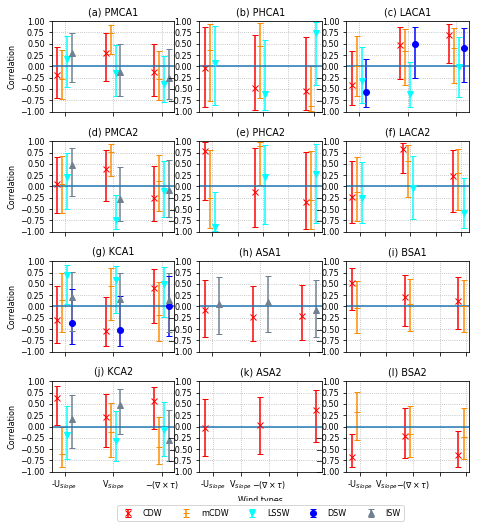

In [558]:
regions2Names = ["PMCA1", "PHCA1",    "LACA1",   
                "PMCA2", "PHCA2",    "LACA2",   
                "KCA1",     "ASA1", "BSA1", 
                "KCA2",     "ASA2", "BSA2"]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1",        
          "(d) PMCA2", "(e) PHCA2", "(f) LACA2", 
          "(g) KCA1","(h) ASA1", "(i) BSA1",
          "(j) KCA2","(k) ASA2", "(l) BSA2" ] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regions2Names, titles=titles2, save=True, 
                                    savename="./Images/waterMassBudgets/windWaterMassCorrelation2.png")

In [592]:
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:759: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


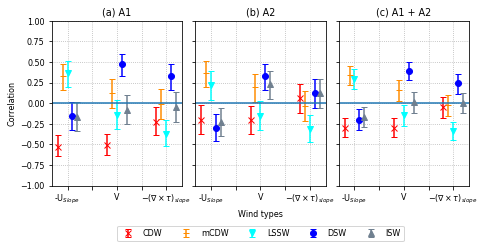

In [593]:
regionsNames = ["A1", "A2", "A"]

titles1 = ["(a) A1", "(b) A2", "(c) A1 + A2"] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regionsNames, titles=titles1, save=True, 
                                    savename="./Images/waterMassBudgets/windWaterMassCorrelation_A1_A2.png", 
                                                mrows=1, ncols=3, ht=4)

In [596]:
selA1 = waterMassThickness.region.str.contains("A1")
selA2 = waterMassThickness.region.str.contains("A2")

In [613]:
calculate_pvalues(waterMassThickness.dropna(), retValue="r")

<class 'pandas.core.frame.DataFrame'>


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest,windMonMean,v10SlopeMonMean,u10SlopeMonMean,u10MonMean,v10MonMean,stress_curl_slope_MonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
CDW,1,-0.395737,-0.283371,-0.281479,-0.179162,-0.0817631,-0.641375,-0.296639,-0.400506,0.304026,0.247544,-0.299756,0.0492124,-0.304026,-0.0492124,-0.222586
DSW,-0.395737,1,0.480271,-0.175929,-0.289781,0.102754,0.182753,0.421905,0.490986,0.200325,0.322848,0.396604,-0.240404,-0.200325,0.240404,0.496645
ISW,-0.283371,0.480271,1,-0.0278834,-0.200823,0.0704007,0.134197,0.240667,0.0789252,0.16627,0.194533,0.0112019,-0.0028205,-0.16627,0.0028205,0.527774
LSSW,-0.281479,-0.175929,-0.0278834,1,0.117967,0.0726457,0.0313472,0.107404,-0.088947,-0.298061,-0.231052,-0.148721,0.343264,0.298061,-0.343264,-0.146413
mCDW,-0.179162,-0.289781,-0.200823,0.117967,1,-0.172391,-0.287358,0.0579466,0.164438,-0.339847,-0.353723,0.156047,0.0229106,0.339847,-0.0229106,-0.111657
month,-0.0817631,0.102754,0.0704007,0.0726457,-0.172391,1,0.191016,0.00188704,-0.0680338,-0.0401975,-0.0589099,-0.0586254,0.0412062,0.0401975,-0.0412062,-0.03512
zlowest,-0.641375,0.182753,0.134197,0.0313472,-0.287358,0.191016,1,0.0628818,0.0750777,-0.0863313,-0.10303,0.0276761,-0.0479945,0.0863313,0.0479945,0.137089
windMonMean,-0.296639,0.421905,0.240667,0.107404,0.0579466,0.00188704,0.0628818,1,0.151124,0.188073,0.239989,-0.0213351,0.238608,-0.188073,-0.238608,0.512387
v10SlopeMonMean,-0.400506,0.490986,0.0789252,-0.088947,0.164438,-0.0680338,0.0750777,0.151124,1,-0.378034,-0.237467,0.965578,-0.675548,0.378034,0.675548,0.0823472
u10SlopeMonMean,0.304026,0.200325,0.16627,-0.298061,-0.339847,-0.0401975,-0.0863313,0.188073,-0.378034,1,0.908358,-0.382831,0.100405,-1,-0.100405,0.472142


In [614]:
calculate_pvalues(waterMassThickness.dropna(), retValue="CI")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


<class 'pandas.core.frame.DataFrame'>


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest,windMonMean,v10SlopeMonMean,u10SlopeMonMean,u10MonMean,v10MonMean,stress_curl_slope_MonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
CDW,"[1.0, 1.0]","[-0.497641530214, -0.283055750705]","[-0.396025410499, -0.162312251972]","[-0.394290468367, -0.160309767398]","[-0.299253192147, -0.0534824803143]","[-0.206515508214, 0.0456050488459]","[-0.710448195195, -0.56006141739]","[-0.40816965205, -0.176383343215]","[-0.501893926766, -0.288261342724]","[0.18423826943, 0.414913457074]","[0.124561983125, 0.363035560461]","[-0.411016967473, -0.179696190461]","[-0.0781707977879, 0.175014489252]","[-0.414913457074, -0.18423826943]","[-0.175014489252, 0.0781707977879]","[-0.339880655123, -0.0984718649651]"
DSW,"[-0.497641530214, -0.283055750705]","[1.0, 1.0]","[0.376309544116, 0.572288280619]","[-0.296211080104, -0.050153434577]","[-0.401897889541, -0.169104631916]","[-0.0244595969487, 0.226693528561]","[0.0571843660527, 0.302630151827]","[0.311697075536, 0.520911283444]","[0.388282719528, 0.581642808857]","[0.0753454135629, 0.319108351765]","[0.204323213825, 0.432042786109]","[0.284002488543, 0.49841567915]","[-0.35642624038, -0.117081054632]","[-0.319108351765, -0.0753454135629]","[0.117081054632, 0.35642624038]","[0.394620105041, 0.586573535205]"
ISW,"[-0.396025410499, -0.162312251972]","[0.376309544116, 0.572288280619]","[1.0, 1.0]","[-0.154232690625, 0.0993632241217]","[-0.319574314713, -0.0758613252286]","[-0.0570035900888, 0.195548774316]","[0.00742839689538, 0.256720286594]","[0.11735635593, 0.356669891401]","[-0.0484551034271, 0.203779347817]","[0.0402233597207, 0.287107135912]","[0.0693503628932, 0.313685064883]","[-0.115857805339, 0.137900918401]","[-0.129669114962, 0.124118955892]","[-0.287107135912, -0.0402233597207]","[-0.124118955892, 0.129669114962]","[0.429653423124, 0.613576430057]"
LSSW,"[-0.394290468367, -0.160309767398]","[-0.296211080104, -0.050153434577]","[-0.154232690625, 0.0993632241217]","[1.0, 1.0]","[-0.0090638179094, 0.241250540676]","[-0.0547540577036, 0.197718102692]","[-0.0959294660701, 0.157615217792]","[-0.0197606666575, 0.231148388841]","[-0.213432979935, 0.0383812817571]","[-0.409469146834, -0.177894652347]","[-0.347751154516, -0.10730298674]","[-0.270510939596, -0.0222457732581]","[0.22622263258, 0.450534201992]","[0.177894652347, 0.409469146834]","[-0.450534201992, -0.22622263258]","[-0.268322527365, -0.019887128929]"
mCDW,"[-0.299253192147, -0.0534824803143]","[-0.401897889541, -0.169104631916]","[-0.319574314713, -0.0758613252286]","[-0.0090638179094, 0.241250540676]","[1.0, 1.0]","[-0.292878884998, -0.0465132087621]","[-0.399679067032, -0.1665356378]","[-0.0694591296006, 0.183492424822]","[0.03834308313, 0.285378251716]","[-0.447446298199, -0.222549782412]","[-0.459972117887, -0.237488066351]","[0.0297412126244, 0.277448414962]","[-0.104287663276, 0.1493713252]","[0.222549782412, 0.447446298199]","[-0.1493713252, 0.104287663276]","[-0.235218998738, 0.0154573253287]"
month,"[-0.206515508214, 0.0456050488459]","[-0.0244595969487, 0.226693528561]","[-0.0570035900888, 0.195548774316]","[-0.0547540577036, 0.197718102692]","[-0.292878884998, -0.0465132087621]","[1.0, 1.0]","[0.065713703649, 0.310387456913]","[-0.125037930632, 0.12875123749]","[-0.19326039663, 0.0593737971885]","[-0.166244537632, 0.0871420286128]","[-0.184426245689, 0.0684971991099]","[-0.18415051496, 0.0687812787479]","[-0.0861392416884, 0.167226819885]","[-0.0871420286128, 0.166244537632]","[-0.167226819885, 0.0861392416884]","[-0.161296158641, 0.092185905523]"
zlowest,"[-0.710448195195, -0.56006141739]","[0.0571843660527, 0.302630151827]","[0.00742839689538, 0.256720286594]","[-0.0959294660701, 0.157615217792]","[-0.399679067032, -0.1665356378]","[0.065713703649, 0.310387456913]","[1.0, 1.0]","[-0.0645281135835, 0.188274522964]","[-0.0523157222458, 0.200066712965]","[-0.210915717419, 0.0410130546278]","[-0.226957801625, 0.0241811543585]","[-0.0995686176616, 0.154030172913]","[-0.173830805066, 0.07

In [ ]:
def plot_WaterMass_Correlation(wmCorr, regionsName=[], titles=[], wd=7.48, ht=9, mrows=4, ncols=3, 
                              waterMass1="CDW", waterMass2="mCDW", waterMass3="DSW", waterMass4="LSSW", 
                              wind=wind_clim_monthly_interpd):
    matplotlib.rcParams.update({'font.size': 8})        
    plt.close(1)
    fig = plt.figure(1, figsize=(wd,ht))    
        
    gs = gridspec.GridSpec(mrows+1, ncols, height_ratios=[1]*mrows+[0.1], width_ratios=[1]*ncols)
    gs.update(hspace=0.4)
    #gs.update(wspace=0.5)
    
    axarr = []
    count = 0
    for i in range(mrows):
        for j in range(ncols):
            axarr.append(plt.subplot(gs[i,j]))
            axarr[-1].scatter(wmCorr.loc[wmRegionMask, waterMass1], wm.loc[wmRegionMask, "windMonMean"], label=waterMass1, color="r")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass2], wm.loc[wmRegionMask, "windMonMean"], label=waterMass2, color="darkorange")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass3], wm.loc[wmRegionMask, "windMonMean"], label=waterMass3, color="b")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass4], wm.loc[wmRegionMask, "windMonMean"], label=waterMass4, color="g")
            axarr[-1].set_title(titles[count])
            if((i == mrows-1) & (j == 1) ):
                axarr[-1].set_xlabel("Water mass thickness (m)")
            if((j == 0)):
                axarr[-1].set_ylabel("Westerlies ($U_{10} ms^{-1}$)")
            count+=1
    
    handles, labels = axarr[-1].get_legend_handles_labels()
    axlegend = plt.subplot(gs[mrows, :])
    axlegend.legend(handles, labels, ncol=4, loc=9)
    axlegend.set_yticklabels([])
    axlegend.set_yticks([])
    axlegend.set_xticklabels([])
    axlegend.set_xticks([])
    axlegend.spines["top"].set_visible(False)
    axlegend.spines["right"].set_visible(False)
    axlegend.spines["left"].set_visible(False)
    axlegend.spines["bottom"].set_visible(False)

    plt.show()


In [ ]:
regions = waterMassThickness.region.unique()

wmColumns = waterMassThickness.columns
for i in range(len(regions)):
    regionMask = waterMassThickness.region == regions[i]
    print(regions[i],waterMassThickness.loc[regionMask, wmColumns[0]].corr(-waterMassThickness.loc[regionMask, "u10MonMean"]), 
          ",v10 ,",waterMassThickness.columns[i], waterMassThickness.loc[regionsA1, wmColumns[i]].corr(-waterMassThickness.loc[regionsA1, "v10MonMean"]))
for i in range(5):
    print("u10 ,",waterMassThickness.columns[i], waterMassThickness.loc[regionsA2, wmColumns[i]].corr(-waterMassThickness.loc[regionsA2, "u10MonMean"]), 
          ",v10 ,",waterMassThickness.columns[i], waterMassThickness.loc[regionsA2, wmColumns[i]].corr(-waterMassThickness.loc[regionsA2, "v10MonMean"]))

In [301]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean'],
      dtype='object')

In [439]:
def plot_easterlies_WaterMass(wm, regionsName=[], regionsLonlim=[], titles=[], wd=7.48, ht=9, mrows=4, ncols=3, 
                              waterMass1="CDW", waterMass2="mCDW", waterMass3="DSW", waterMass4="LSSW", 
                              wind=wind_clim_monthly_interpd, windType="u10SlopeMonMean", set_ylim=False, ylim=[-0.02, 0.02]):
    matplotlib.rcParams.update({'font.size': 8})        
    plt.close(1)
    fig = plt.figure(1, figsize=(wd,ht))    
        
    gs = gridspec.GridSpec(mrows+1, ncols, height_ratios=[1]*mrows+[0.1], width_ratios=[1]*ncols)
    gs.update(hspace=0.4)
    #gs.update(wspace=0.5)
    
    axarr = []
    count = 0
    for i in range(mrows):
        for j in range(ncols):
            wmRegionMask = (wm.region == regionsName[count])
            
            axarr.append(plt.subplot(gs[i,j]))
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass1], wm.loc[wmRegionMask, windType], label=waterMass1, color="r")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass2], wm.loc[wmRegionMask, windType], label=waterMass2, color="darkorange")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass3], wm.loc[wmRegionMask, windType], label=waterMass3, color="b")
            axarr[-1].scatter(wm.loc[wmRegionMask, waterMass4], wm.loc[wmRegionMask, windType], label=waterMass4, color="g")
            axarr[-1].set_title(titles[count])
            if set_ylim:
                axarr[-1].set_ylim(ylim[0], ylim[1])
            if((i == mrows-1) & (j == 1) ):
                axarr[-1].set_xlabel("Water mass thickness (m)")
            if((j == 0)):
                axarr[-1].set_ylabel("Westerlies ($U_{10} ms^{-1}$)")
            count+=1
    
    handles, labels = axarr[-1].get_legend_handles_labels()
    axlegend = plt.subplot(gs[mrows, :])
    axlegend.legend(handles, labels, ncol=4, loc=9)
    axlegend.set_yticklabels([])
    axlegend.set_yticks([])
    axlegend.set_xticklabels([])
    axlegend.set_xticks([])
    axlegend.spines["top"].set_visible(False)
    axlegend.spines["right"].set_visible(False)
    axlegend.spines["left"].set_visible(False)
    axlegend.spines["bottom"].set_visible(False)

    plt.show()


In [433]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean'],
      dtype='object')

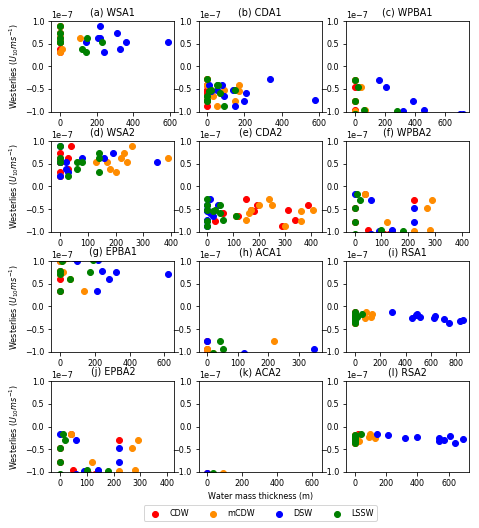

In [445]:
regions1Names = ["WSA1", "CDA1",    "WPBA1",   
                "WSA2", "CDA2",    "WPBA2",   
                "EPBA1",     "ACA1", "RSA1", 
                "WPBA2",     "ACA2", "RSA2"]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], [-40,-20], [60,70], [70, 75],
                  [75,82], [135,145], [160,180], [75,82], [135,145], [160,180]]

plot_easterlies_WaterMass(waterMassThickness, regionsName=regions1Names, regionsLonlim=region1LonLims, titles=titles1, 
                         windType="stress_curl_slope_MonMean", set_ylim=True, ylim=[-1e-7, 1e-7])


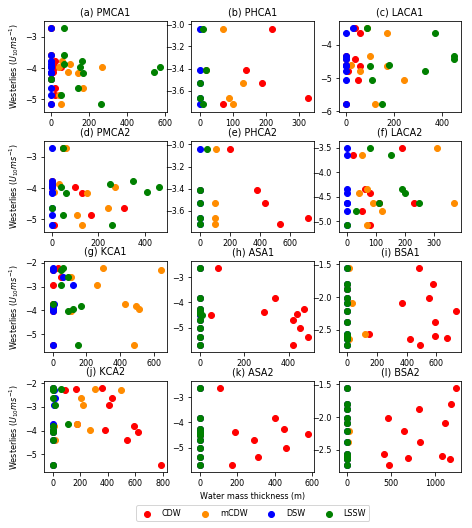

In [465]:
regions2Names = ["PMCA1", "PHCA1",    "LACA1",   
                "PMCA2", "PHCA2",    "LACA2",   
                "KCA1",     "ASA1", "BSA1", 
                "KCA2",     "ASA2", "BSA2"]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1",        
          "(d) PMCA2", "(e) PHCA2", "(f) LACA2", 
          "(g) KCA1","(h) ASA1", "(i) BSA1",
          "(j) KCA2","(k) ASA2", "(l) BSA2" ] 

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], [-20.,0.] , [29,37], [82,87],
                  [101,112], [-120,-100], [-100,-60], [101,112], [-120,-100], [-100,-60]]

plot_easterlies_WaterMass(waterMassThickness, regionsName=regions2Names, regionsLonlim=region2LonLims, titles=titles2)


In [212]:
writer = pd.ExcelWriter('./data/waterMassCorrelations.xlsx')
waterMassThickness.groupby("region").corr().to_excel(writer, "Sheet1")
writer.save()

In [432]:
wmCorr.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month',
       'stress_curl_slope_MonMean', 'u10MonMean', 'u10SlopeMonMean',
       'v10MonMean', 'v10SlopeMonMean', 'windMonMean', 'zlowest'],
      dtype='object')

In [429]:
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

In [446]:
waterMassThickness.region.unique()

array(['WSA1', 'CDA1', 'WPBA1', 'WSA2', 'CDA2', 'WPBA2', 'EPBA1', 'ACA1',
       'RSA1', 'EPBA2', 'ACA2', 'RSA2', 'PMCA1', 'PHCA1', 'LACA1', 'PMCA2',
       'PHCA2', 'LACA2', 'KCA1', 'ASA1', 'BSA1', 'KCA2', 'ASA2', 'BSA2'], dtype=object)

In [ ]:
regions = waterMassThickness.region.unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], [-40,-20], [60,70], [70, 75],
                  [75,82], [135,145], [170,180], [75,82], [135,145], [170,180]]

region1LatLims = [ [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35], [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],
                   [-66.9, -65.215], [-66, -65.4], [-73.45, -70], [-66.9, -65.215], [-66, -65.4], [-73.45, -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], [-20.,0.] , [29,37], [82,87],
                  [101,112], [-120,-100], [-100,-60], [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56], [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56],
                   [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4], [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regions)

for i in range(len(regionsLonlim)):
    wmRegionMask = (waterMassThickness.region == regions[i])
    
    u10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]], 
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=wind_clim_monthly_interpd)
    v10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=v10_clim_monthly_interpd)
    windStressCurl_MonMeanRegional, regionalMasks[i] = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=stress_curl_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMask, "u10SlopeMonMean"] = u10_MonMeanRegional
    waterMassThickness.loc[wmRegionMask, "v10SlopeMonMean"] = v10_MonMeanRegional
    waterMassThickness.loc[wmRegionMask, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional